# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [22]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


Distribution of the 'fraud' target variable:
fraud
0.0    0.912597
1.0    0.087403
Name: proportion, dtype: float64


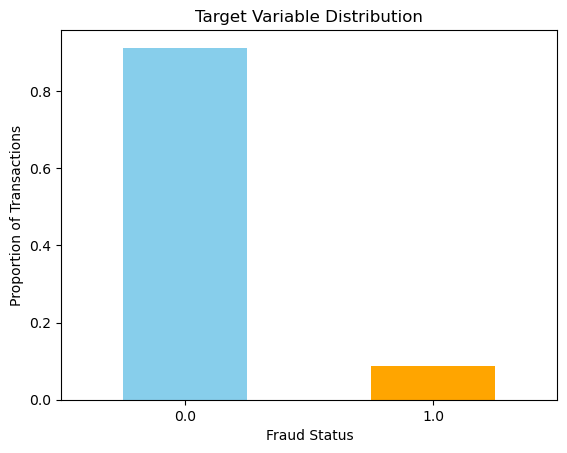

In [3]:
# Check the distribution of the target variable
if 'fraud' in fraud.columns:
    # Count the values for each class
    class_distribution = fraud['fraud'].value_counts(normalize=True)
    print("Distribution of the 'fraud' target variable:")
    print(class_distribution)

    # Visualize the distribution
    class_distribution.plot(kind='bar', title='Target Variable Distribution', color=['skyblue', 'orange'])
    plt.ylabel('Proportion of Transactions')
    plt.xlabel('Fraud Status')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("The column 'fraud' is not available. Please check the data structure.")

## LOGISTIC REGRESSION 

In [29]:
features = fraud.drop(columns='fraud')  # Drop target column to get features
target = fraud['fraud']  # Define the target variable

In [30]:
# split the data 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [32]:
# Standardize the features
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Logistic Regression 

In [34]:
log_reg = LogisticRegression()

In [39]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
log_reg.score(X_test_scaled, y_test)

0.958884

In [44]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228284
         1.0       0.89      0.60      0.72     21716

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



## Oversampling

In [46]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns) 

In [47]:
train["fraud"] = y_train.values

In [48]:
fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [49]:
fraud_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [51]:
train_over = pd.concat([fraud_oversampled, no_fraud])
train_over.fraud.value_counts()

fraud
1.0    684313
0.0    684313
Name: count, dtype: int64

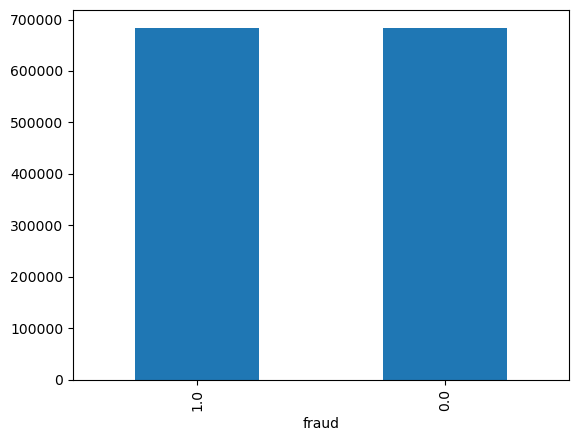

In [52]:
fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [ ]:
# Now, with balanced data, we will create a new instance of Logistic Regression.

In [53]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [54]:
log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [55]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228284
         1.0       0.58      0.95      0.72     21716

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



## Undersampling (cut out data from the majority class)¶

Undersampling involves removing data points from the majority class to align its size with that of the minority class

In [56]:
train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.056810,-0.098864,-0.482275,0.36593,1.361848,-0.335384,0.731805,0.0
1,-0.212165,0.086548,-0.583888,0.36593,-0.734296,-0.335384,0.731805,0.0
2,-0.374441,-0.186199,-0.356000,0.36593,-0.734296,-0.335384,-1.366484,0.0
3,-0.310124,0.079369,-0.389252,0.36593,1.361848,-0.335384,-1.366484,0.0
4,-0.339899,-0.187578,0.869320,0.36593,-0.734296,2.981658,0.731805,0.0
...,...,...,...,...,...,...,...,...
749995,-0.320866,-0.178988,-0.396692,0.36593,-0.734296,-0.335384,0.731805,0.0
749996,-0.376471,-0.135067,-0.163583,0.36593,1.361848,-0.335384,0.731805,0.0
749997,-0.326270,-0.137114,0.284501,0.36593,-0.734296,-0.335384,0.731805,0.0
749998,-0.193511,-0.187152,0.016412,0.36593,-0.734296,-0.335384,0.731805,0.0


In [57]:
no_diabetes_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
736114,0.448798,-0.185643,0.094250,0.365930,1.361848,-0.335384,0.731805,0.0
177122,-0.192833,0.038105,-0.488375,0.365930,1.361848,-0.335384,0.731805,0.0
633478,-0.384094,-0.185919,0.458435,-2.732759,-0.734296,-0.335384,-1.366484,0.0
433314,-0.206347,0.051458,-0.524341,0.365930,-0.734296,-0.335384,0.731805,0.0
508314,0.223581,-0.162390,-0.355830,0.365930,1.361848,-0.335384,-1.366484,0.0
...,...,...,...,...,...,...,...,...
285509,-0.382810,-0.170630,0.040966,-2.732759,-0.734296,-0.335384,0.731805,0.0
464605,0.032201,0.072210,-0.423664,0.365930,-0.734296,-0.335384,-1.366484,0.0
252569,0.135869,-0.178100,-0.347413,0.365930,-0.734296,-0.335384,-1.366484,0.0
528667,0.032353,-0.147785,-0.571402,0.365930,-0.734296,-0.335384,0.731805,0.0


In [58]:
train_undersampling = pd.concat([no_diabetes_undersampled, fraud])
train_undersampling

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
736114,0.448798,-0.185643,0.094250,0.365930,1.361848,-0.335384,0.731805,0.0
177122,-0.192833,0.038105,-0.488375,0.365930,1.361848,-0.335384,0.731805,0.0
633478,-0.384094,-0.185919,0.458435,-2.732759,-0.734296,-0.335384,-1.366484,0.0
433314,-0.206347,0.051458,-0.524341,0.365930,-0.734296,-0.335384,0.731805,0.0
508314,0.223581,-0.162390,-0.355830,0.365930,1.361848,-0.335384,-1.366484,0.0
...,...,...,...,...,...,...,...,...
749885,-0.355030,1.924465,-0.259774,0.365930,-0.734296,-0.335384,0.731805,1.0
749904,0.287624,-0.139217,1.531235,0.365930,-0.734296,-0.335384,0.731805,1.0
749917,-0.302680,8.030362,-0.637821,0.365930,-0.734296,-0.335384,0.731805,1.0
749923,1.969983,-0.083571,1.157780,0.365930,-0.734296,-0.335384,0.731805,1.0


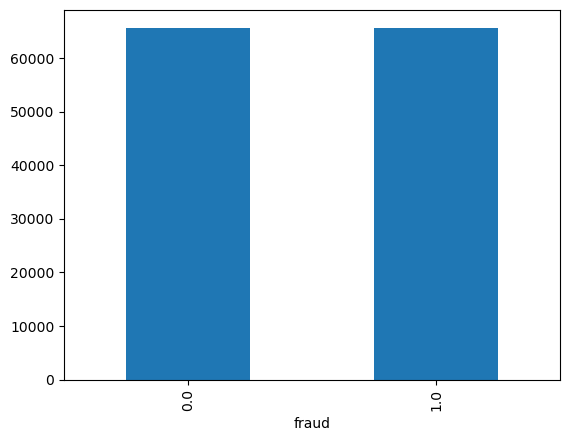

In [60]:
survived_plt = train_undersampling["fraud"].value_counts()
survived_plt.plot(kind="bar")
plt.show()

Now, we have the same amount of observations for both fraud and not_fraud. Let's see how it can impact our model

- Separating our features from our target

In [62]:
X_train_under = train_undersampling.drop(columns = ["fraud"])
y_train_under = train_undersampling["fraud"]

In [63]:
log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [64]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228284
         1.0       0.57      0.95      0.72     21716

    accuracy                           0.93    250000
   macro avg       0.78      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



## SMOTE

SMOTE utilizes KNN approach to generate synthetic samples for the minority class.

SMOTE comes from a different package - imblearn

In [65]:
!pip install scikit-learn==1.2.2
!pip install imblearn

Now, we need to create a SMOTE object in order to balance our data

- sampling_strategy - corresponds to the ratio of the number of samples in the minority class over the number of samples in the majority class.

In [66]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [67]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [68]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

- Evaluate our model

In [69]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228284
         1.0       0.58      0.95      0.72     21716

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

